### Calculating PCA manually using Python

In [ ]:
# Steps
# 1. Check if our mean is zero or not if not then Standardize it
# 2. Draw a line which is going to derive the data (best fit line)
# 3. Find egan value and egan vector
# 4. Rotate the axis with PC1

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Creating an array
A=np.array([
    [3,7],
    [-4,-6],
    [7,8],
    [1,-1],
    [-4,-1],
    [-3,-7],
])

In [3]:
A

array([[ 3,  7],
       [-4, -6],
       [ 7,  8],
       [ 1, -1],
       [-4, -1],
       [-3, -7]])

In [4]:
# Calculating the mean
(3-4+7+1-4-3)/6

0.0

In [5]:
A.shape

(6, 2)

In [6]:
# Converting into a data frame
df=pd.DataFrame(A,columns=['A0','A1'])
df

,A0,A1
0,3,7
1,-4,-6
2,7,8
3,1,-1
4,-4,-1
5,-3,-7


In [7]:
df['A1'].mean()

0.0

In [8]:
df['A0'].mean()

0.0

In [9]:
np.std(df)

A0    4.082483
A1    5.773503
dtype: float64

In [10]:
a0=A[:,0]
a1=A[:,1]

In [11]:
a0

array([ 3, -4,  7,  1, -4, -3])

In [12]:
a1

array([ 7, -6,  8, -1, -1, -7])

In [13]:
np.cov(a0,a1)

array([[20., 25.],
       [25., 40.]])

In [14]:
np.sum(a0*a1)/5

25.0

In [15]:
df.cov()

,A0,A1
A0,20.0,25.0
A1,25.0,40.0


In [16]:
# @ is for matrix multiplications
sigma=A.T @ A/5

##### Egan vector:- If we can represent two or more column in some other format(axis) then it  is know as  egan vector.

* If we can find the value of lambda then we can represent any number of columns in other form 
     
   ### T=λ-V
   
   

In [17]:
# Egan vector
# We are getting  2 lambda we go for higher one to calculate PC1
l,x=np.linalg.eig(sigma)
print(l,"\n",x)

[ 3.07417596 56.92582404] 
 [[-0.82806723 -0.56062881]
 [ 0.56062881 -0.82806723]]


In [18]:
l

array([ 3.07417596, 56.92582404])

In [19]:
x

array([[-0.82806723, -0.56062881],
       [ 0.56062881, -0.82806723]])

In [20]:
sigma@x[:,0]

array([-2.54562438,  1.72347161])

In [21]:
sigma@x[:,1]

array([-31.91425695, -47.13840945])

In [22]:
print("First principal component")
x[:,1]

First principal component


array([-0.56062881, -0.82806723])

In [23]:
print("First principal component")
x[:,0]

First principal component


array([-0.82806723,  0.56062881])

In [24]:
PC1_arr=A @ x[:,1]

In [25]:
PC1_arr

array([ -7.47835704,   7.21091862, -10.54893951,   0.26743842,
         3.07058247,   7.47835704])

In [26]:
PC2_arr=A @ x[:,0]

In [27]:
PC2_arr

array([ 1.44019997, -0.05150393, -1.31144014, -1.38869604,  2.75164011,
       -1.44019997])

In [28]:
df=pd.read_csv(r"C:\Users\Aman\Downloads\glass_data.csv")

In [29]:
df.columns=["Index","RL","Na","Mg","AL","Si","K","Ca","Ba","Fe","Class"]

In [30]:
df.columns

Index(['Index', 'RL', 'Na', 'Mg', 'AL', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'], dtype='object')

In [31]:
df

,Index,RL,Na,Mg,AL,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [32]:
df.drop(columns=["Index","Class"])

,RL,Na,Mg,AL,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [33]:
df.describe()

,Index,RL,Na,Mg,AL,Si,K,Ca,Ba,Fe,Class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scale=StandardScaler()

In [36]:
df2=pd.DataFrame(scale.fit_transform(df))
df2

,0,1,2,3,4,5,6,7,8,9,10
0,-1.723976,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,-0.848275
1,-1.707788,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,-0.848275
2,-1.691601,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,-0.848275
3,-1.675413,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,-0.848275
4,-1.659226,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,-0.848275
...,...,...,...,...,...,...,...,...,...,...,...
209,1.659226,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451,2.010478
210,1.675413,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451,2.010478
211,1.691601,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451,2.010478
212,1.707788,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451,2.010478


In [37]:
# E to the power is close to 0 
df2.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,2.075183e-18,-2.877449e-14,2.179980e-15,-2.801497e-16,-3.434428e-16,9.966067e-16,7.470660e-17,-3.137418e-16,-1.763906e-16,-6.121791e-17,-1.128900e-15
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-1.723976e+00,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01,-8.482747e-01
25%,-8.619880e-01,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01,-8.482747e-01
50%,0.000000e+00,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01,-3.718159e-01
75%,8.619880e-01,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01,1.046428e-01
max,1.723976e+00,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00,2.010478e+00


In [38]:
sigma=np.cov(df2)

In [39]:
sigma=df2.T @ df2/213

In [40]:
l,x=np.linalg.eig(sigma)

In [41]:
l

array([3.68386022e+00, 2.36576668e+00, 1.41639247e+00, 1.18127362e+00,
       9.19100060e-01, 6.09947340e-01, 8.43416417e-02, 5.32141366e-02,
       1.57767942e-03, 3.64115108e-01, 3.72054233e-01])

In [42]:
x

array([[ 4.38824473e-01, -1.29996803e-01,  1.52963123e-02,
         9.09447723e-02,  3.12107487e-02,  3.84355211e-01,
        -4.19874901e-01,  2.96414533e-01, -1.39409133e-02,
         5.72448277e-01,  2.03170024e-01],
       [-1.45563043e-01, -5.94720501e-01,  8.93648161e-02,
        -1.51695775e-01, -7.45674537e-02, -7.03775477e-02,
         4.76370527e-01,  5.82995233e-01,  2.26431414e-02,
         5.71483971e-02,  1.14091943e-01],
       [ 2.85277234e-01,  4.05238471e-02, -3.56636312e-01,
        -5.32318013e-01,  1.58495648e-01,  3.65376890e-01,
        -1.74780402e-02,  1.71789796e-01, -3.14143150e-01,
        -4.67146126e-01, -3.27568489e-02],
       [-4.01764656e-01,  2.80313654e-01, -1.91558930e-02,
        -2.86307560e-01,  1.33560514e-01,  1.66113517e-02,
         1.81072627e-01, -4.54189160e-02, -5.75521458e-01,
         5.41738482e-01, -6.29168990e-04],
       [ 3.80388849e-01,  1.60331732e-01,  3.53452217e-01,
         7.39577697e-02,  6.49234361e-03, -1.74769824e-01,
  

In [43]:
PC1=df2 @ x[:,0]

In [44]:
PC1.shape

(214,)

In [45]:
PC2=df2 @ x[:,1]

In [46]:
PC2

0     -0.264014
1      1.200197
2      1.579327
3      0.979452
4      1.208490
         ...   
209   -0.325086
210   -0.337859
211   -1.010190
212   -0.166917
213   -0.407697
Length: 214, dtype: float64

#### Verifying our Process

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca=PCA(n_components=2)

In [49]:
PC1

0     -2.145401
1     -1.289108
2     -1.163621
3     -1.618372
4     -1.544870
         ...   
209    4.607953
210    4.637589
211    4.359686
212    4.478174
213    4.552573
Length: 214, dtype: float64

In [50]:
pca.fit_transform(df2)

array([[-2.14540054e+00,  2.64014297e-01],
       [-1.28910765e+00, -1.20019734e+00],
       [-1.16362112e+00, -1.57932728e+00],
       [-1.61837189e+00, -9.79452339e-01],
       [-1.54487020e+00, -1.20849016e+00],
       [-1.66334292e+00, -1.28053110e+00],
       [-1.59328915e+00, -1.14100295e+00],
       [-1.70476414e+00, -1.09477227e+00],
       [-1.33032873e+00, -5.02878296e-01],
       [-1.66737565e+00, -9.01521637e-01],
       [-1.59664725e+00, -1.37079926e+00],
       [-1.68327445e+00, -9.36492879e-01],
       [-1.63834353e+00, -1.33347870e+00],
       [-1.79289994e+00, -8.60631362e-01],
       [-1.64869036e+00, -1.02978786e+00],
       [-1.61818180e+00, -1.03610463e+00],
       [-1.78201259e+00, -8.23224215e-01],
       [-1.85472477e+00,  9.14083942e-01],
       [-1.53363975e+00, -1.48936960e-02],
       [-1.29175026e+00, -9.47625582e-01],
       [-1.66338328e+00, -6.73603526e-01],
       [-1.93522966e+00,  4.30654894e-01],
       [-1.60101588e+00, -8.27838475e-01],
       [-1.

In [51]:
pca=PCA()

In [52]:
principal_component=pca.fit_transform(df2)

In [53]:
evr=np.cumsum(pca.explained_variance_ratio_)
evr

array([0.33333145, 0.54739615, 0.6755574 , 0.7824441 , 0.86560821,
       0.92079885, 0.95446391, 0.98741061, 0.9950422 , 0.99985724,
       1.        ])

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Principal Components')

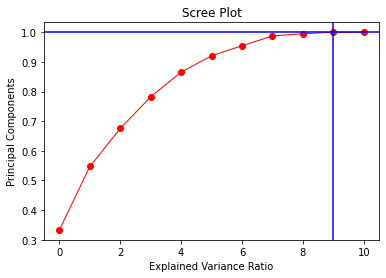

In [76]:
plt.figure()
plt.plot(evr,'o-', linewidth=1, color='r')
plt.axhline(y=1,color="b")
plt.axvline(x=9,color="b")
plt.title("Scree Plot")
plt.xlabel("Explained Variance Ratio")
plt.ylabel("Principal Components")

In [ ]:
# We need to choose minimum PC values which are justifing most of the data in this 8 or 9.